<a href="https://colab.research.google.com/github/cosierlabs/geomapper_jupyter/blob/main/Geomapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installed Packages

In [ ]:
# !pip install cartopy
# !pip install hvplot
# !pip install netCDF4 xarray
# !pip install metpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.5/409.5 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 18.7 MB/s eta 0:00:00


NetCDF Global Sea Surface Temperature map visualization.

Text(0.5, 1.0, 'Sea Surface Temperature')

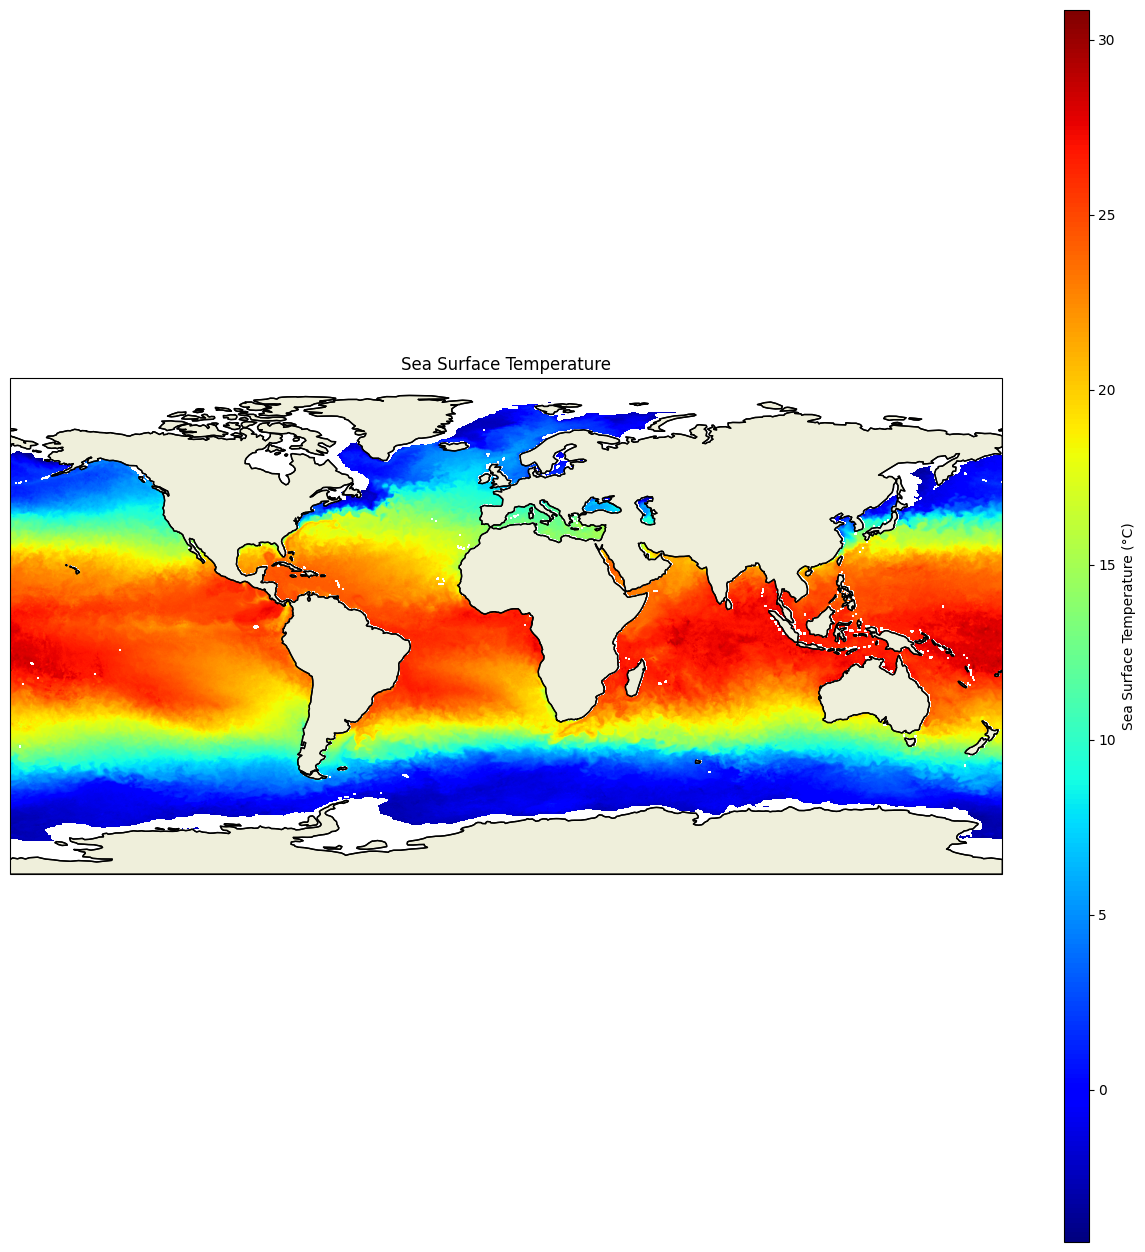

In [ ]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
from metpy.cbook import get_test_data


dataset = xr.open_dataset('20190210000000-NAVO-L4_GHRSST-SST1m-K10_SST-GLOB-v02.0-fv01.0.nc4')
ds_var = dataset.metpy.parse_cf('analysed_sst')

lat = ds_var.lat
lon = ds_var.lon


im_data = ds_var.isel(time=0)
im_data


fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
mp = ax.imshow(im_data-275.5, extent=(lon.min(), lon.max(), lat.min(), lat.max()),
               cmap='jet', origin='upper')

ax.add_feature(cfeature.LAND, zorder=1, edgecolor='black')
ax.add_feature(cfeature.COASTLINE, zorder=1)



cbar = plt.colorbar(mp, orientation='vertical', pad=0.05, aspect=50)
cbar.set_label('Sea Surface Temperature (°C)')

plt.title('Sea Surface Temperature')


# dataset
# ds_var

In [ ]:
# import netCDF4 as nc
# import numpy as np
# import xarray as xr
# import hvplot.xarray
# import matplotlib.pyplot as plt
# import cartopy.crs as crs
# import cartopy.feature as cfeature

# dataset = nc.Dataset('20190210000000-NAVO-L4_GHRSST-SST1m-K10_SST-GLOB-v02.0-fv01.0.nc4', mode='r')

# latitude = dataset.variables['lat'][:]
# longitude = dataset.variables['lon'][:]
# seasurface_temp = dataset.variables['analysed_sst'][0, :, :]

# sst_celcius = seasurface_temp - 273.15

# plt.figure(figsize=(8,8))
# ax = plt.axes(projection=crs.PlateCarree())

# ax.set_extent([120, 130, 5, 10], crs=crs.PlateCarree())
# ax.coastlines(resolution='110m')
# ax.add_feature(cfeature.BORDERS, linestyle=':')
# ax.add_feature(cfeature.LAND, color='green')
# ax.add_feature(cfeature.OCEAN, color='lightblue')


# lon, lat = np.meshgrid(longitude, latitude)

# sst_plot = ax.pcolormesh(lon, lat, sst_celcius, cmap='coolwarm', transform=crs.PlateCarree())

# cbar = plt.colorbar(sst_plot, orientation='horizontal', pad=0.07)
# cbar.set_label('Sea Surface Temperature (°C)')
# plt.title('Global Sea Surface Temperature')
# plt.show()

